In [24]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [25]:
hu_load = pd.read_csv("load.csv")
hu_load['Timestamp'] = pd.to_datetime(hu_load['Timestamp'], format='%Y/%m/%d %H:%M')
hu_load['Load'] = hu_load['Load'] * 4
display(hu_load)

,Timestamp,Load
0,2023-01-01 00:00:00,43.56
1,2023-01-01 00:15:00,41.76
2,2023-01-01 00:30:00,43.56
3,2023-01-01 00:45:00,41.16
4,2023-01-01 01:00:00,41.36
...,...,...
35035,2023-12-31 22:45:00,32.40
35036,2023-12-31 23:00:00,26.48
35037,2023-12-31 23:15:00,35.76
35038,2023-12-31 23:30:00,33.00


In [26]:
data = hu_load['Load'][14496:23328].to_numpy()

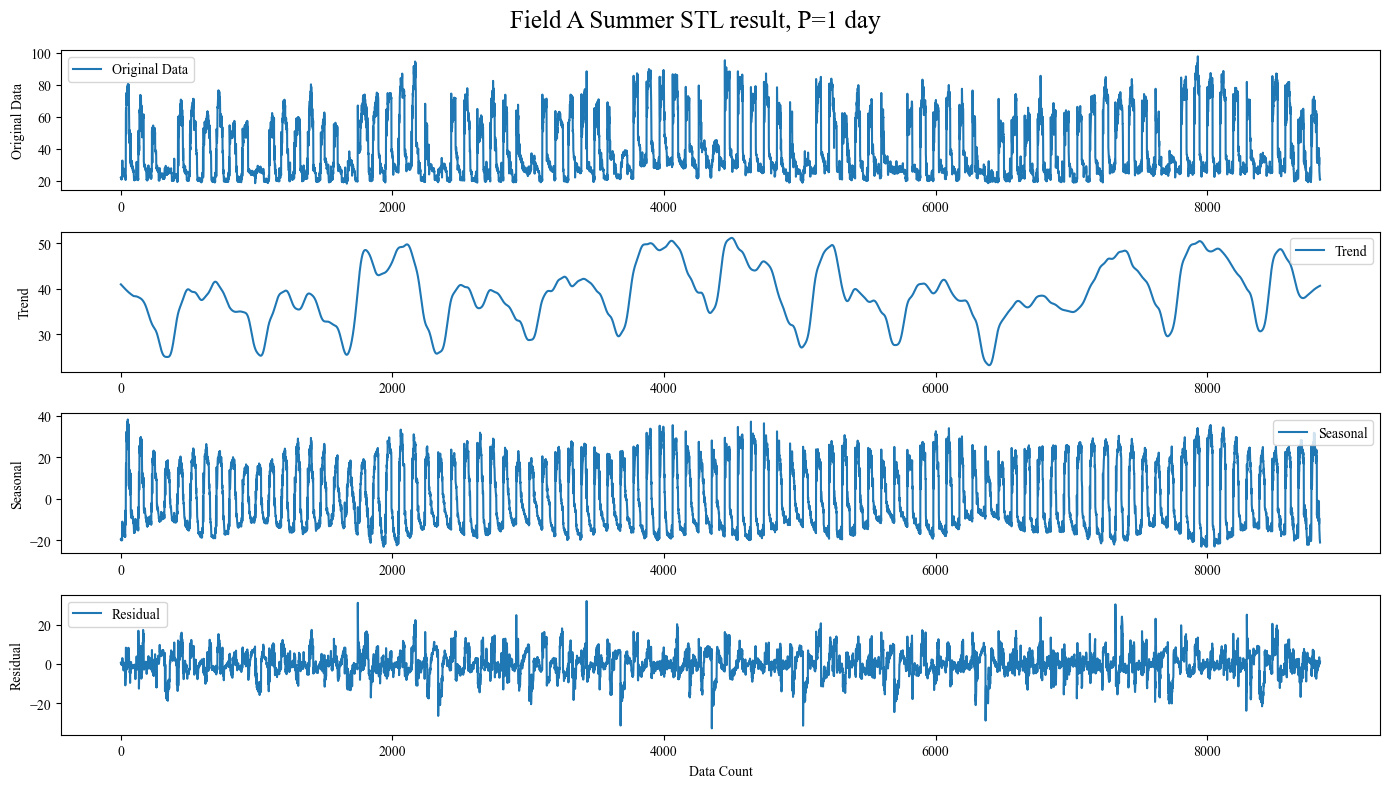

In [27]:
result = STL(data, period=96).fit()
seasonal = result.seasonal
trend = result.trend
residual = result.resid

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 8))
plt.suptitle('Field A Summer STL result, P=1 day', fontsize=18)

plt.subplot(411)
plt.plot(data, label='Original Data')
plt.ylabel('Original Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.ylabel('Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.ylabel('Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.ylabel('Residual')
plt.xlabel('Data Count')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig("summer_STL_day.png", dpi=1300)
plt.show()



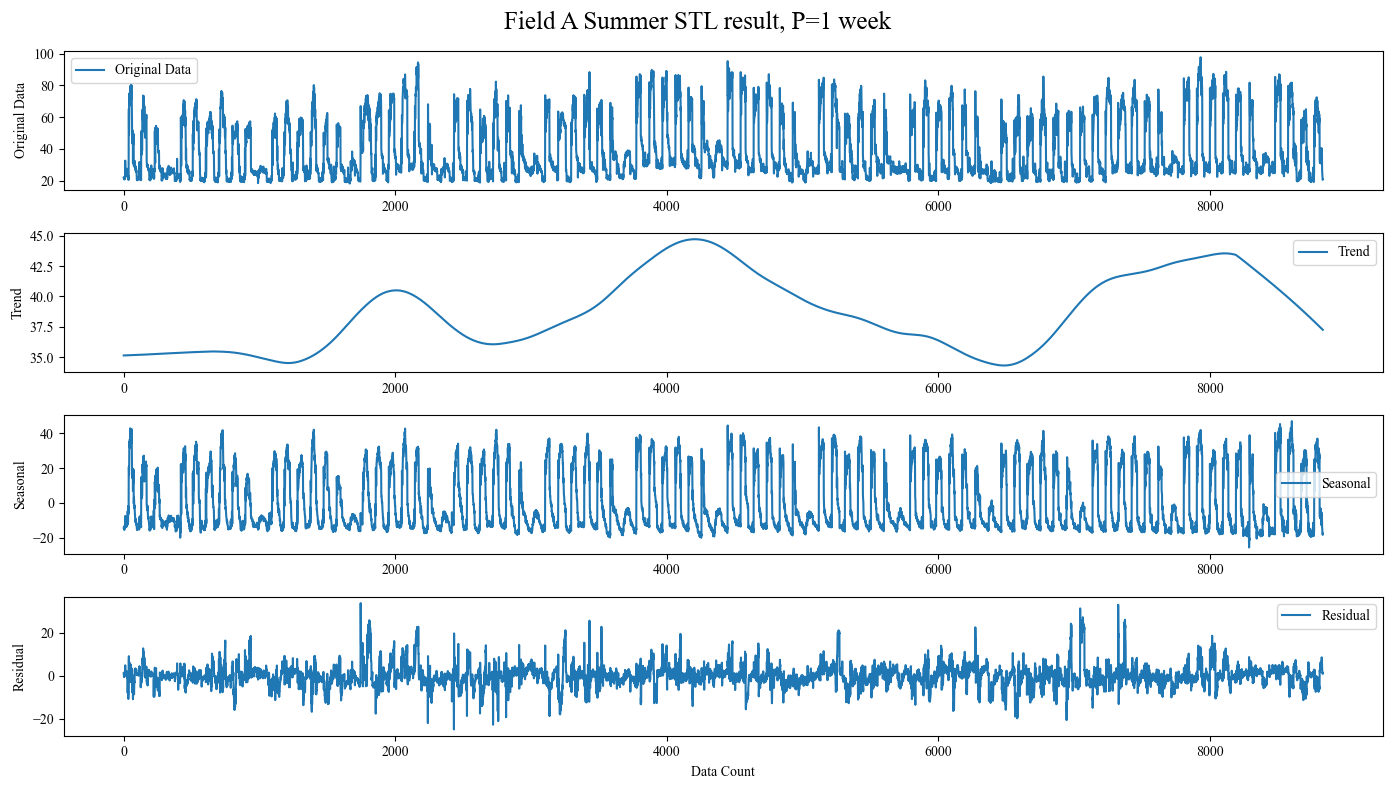

In [28]:
result = STL(data, period=96*7).fit()

seasonal = result.seasonal
trend = result.trend
residual = result.resid

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 8))
plt.suptitle('Field A Summer STL result, P=1 week', fontsize=18)

plt.subplot(411)
plt.plot(data, label='Original Data')
plt.ylabel('Original Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.ylabel('Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.ylabel('Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.ylabel('Residual')
plt.xlabel('Data Count')
plt.legend(loc='best')

plt.tight_layout()
plt.savefig("summer_STL_week.png", dpi=1300)
plt.show()
